# Assignment 4 - Classification benchmarks
DESCRIPTION

__Classifier benchmarks using Logistic Regression and a Neural Network__



This assignment builds on the work we did in class and from session 6.



You'll use your new knowledge and skills to create two command-line tools which can be used to perform a simple classification task on the MNIST data and print the output to the terminal. These scripts can then be used to provide easy-to-understand benchmark scores for evaluating these models.



You should create two Python scripts. One takes the full MNIST data set, trains a Logistic Regression Classifier, and prints the evaluation metrics to the terminal. The other should take the full MNIST dataset, train a neural network classifier, and print the evaluation metrics to the terminal.





Tips

* I suggest using scikit-learn for the Logistic Regression Classifier
* In class, we only looked at a small sample of MNIST data. I suggest using fetch_openml() to get the full dataset, like we did in session 6
* You can use the NeuralNetwork() class that I introduced you to during the code along session
* I recommend saving your .py scripts in a folder called src﻿; and have your NeuralNetwork class in a folder called utils, like we have on worker02
* You may need to do some data manipulation to get the MNIST data into a usable format for your models
* If you have trouble doing this on your own machine, use worker02!


In [38]:
import os
import sys
sys.path.append(os.path.join(".."))

# Import teaching utils
import numpy as np
import utils.classifier_utils as clf_util

# Import sklearn metrics
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn import datasets


import argparse
from utils.neuralnetwork import NeuralNetwork

In [4]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [6]:
#X = the pictures, y = the category.
X = np.array(X)
y = np.array(y)

In [13]:
#Viser hvad vi har gang:
classes = sorted(set(y))
nclasses = len(classes)

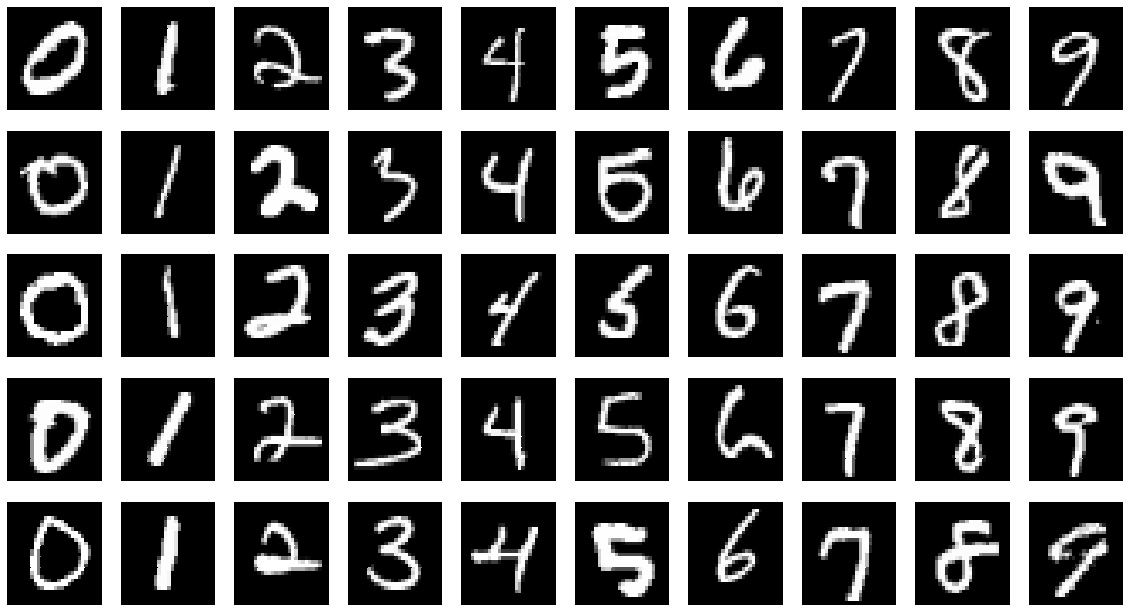

In [14]:
#Plotter billeder
clf_util.plot_sample(X, y, classes, 5)

In [25]:
#Creating training and test data.
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    #random_state=9,
                                                    train_size=7500, 
                                                    test_size=2500)

In [26]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [27]:
clf = LogisticRegression(penalty='none', 
                         tol=0.1, 
                         solver='saga',
                         multi_class='multinomial').fit(X_train_scaled, y_train)

In [28]:
#to check the shape of the coefficient matrix
clf.coef_.shape

(10, 784)

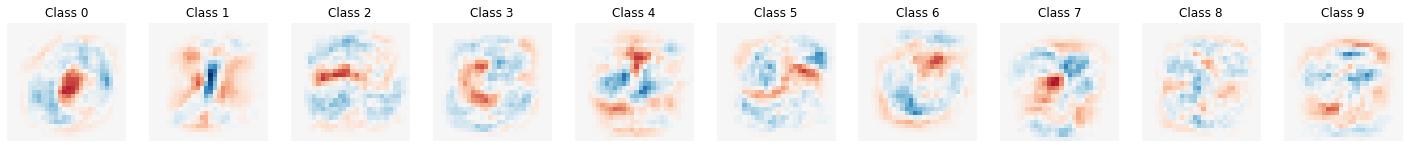

In [29]:
clf_util.plot_coefs(clf.coef_, nclasses)

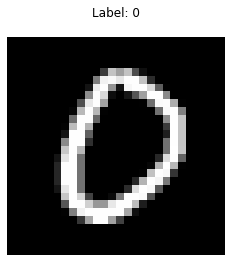

In [30]:
clf_util.plot_individual(X_test_scaled, y_test, 50)

I think that this is class 0


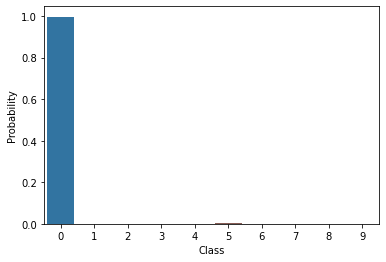

In [37]:
clf_util.plot_probs(X_test_scaled, 50, clf, classes)

In [32]:
y_pred = clf.predict(X_test_scaled)

In [33]:
#method 2
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9024


In [35]:
cm = metrics.classification_report(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       263
           1       0.93      0.96      0.95       283
           2       0.91      0.91      0.91       259
           3       0.88      0.88      0.88       231
           4       0.92      0.89      0.90       262
           5       0.84      0.86      0.85       230
           6       0.94      0.94      0.94       254
           7       0.89      0.89      0.89       265
           8       0.85      0.84      0.85       223
           9       0.86      0.87      0.87       230

    accuracy                           0.90      2500
   macro avg       0.90      0.90      0.90      2500
weighted avg       0.90      0.90      0.90      2500



# Opgave 2


In [39]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [40]:
#X = the pictures, y = the category.
X = np.array(X)
y = np.array(y)

In [41]:
X = (X - X.min())/(X.max() - X.min())

In [42]:
#Creating training and test data.
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    #random_state=9,
                                                    train_size=7500, 
                                                    test_size=2500)

In [43]:
# convert labels from integers to vectors
y_train = LabelBinarizer().fit_transform(y_train)
y_test = LabelBinarizer().fit_transform(y_test)

In [46]:
# train network
print("[INFO] training network...")
nn = NeuralNetwork([X_train.shape[1], 32, 10])
print("[INFO] {}".format(nn))
nn.fit(X_train, y_train, epochs=100)

[INFO] training network...
[INFO] NeuralNetwork: 784-32-10
[INFO] epoch=1, loss=802.6626889
[INFO] epoch=100, loss=56.5960751


In [47]:
# evaluate network
print(["[INFO] evaluating network..."])
predictions = nn.predict(X_test)
predictions = predictions.argmax(axis=1)
print(classification_report(y_test.argmax(axis=1), predictions))

['[INFO] evaluating network...']
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       242
           1       0.98      0.98      0.98       271
           2       0.95      0.88      0.91       268
           3       0.90      0.87      0.89       269
           4       0.91      0.94      0.92       235
           5       0.90      0.93      0.91       206
           6       0.97      0.97      0.97       281
           7       0.94      0.95      0.95       260
           8       0.90      0.94      0.92       228
           9       0.94      0.90      0.92       240

    accuracy                           0.93      2500
   macro avg       0.93      0.93      0.93      2500
weighted avg       0.94      0.93      0.93      2500

